# Desafio Técnico Economapas (Relatório de Vendas 2020/2021)

## 1)	As tabelas fornecidas, no arquivo anexo, contêm dados relativos à prospecção de potenciais clientes (leads), e aqueles que foram efetivamente convertidos, tornando-se clientes (vendidos). A partir desses dados, elabore uma análise, tendo como objetivo explicar os fatores que mais impactam para que um lead seja convertido. A análise deverá contemplar, minimamente, os seguintes quesitos:

## a.	Quais os fatores/características você considerou na análise?

As tabelas fornecidas em formato de documento .xlsx contendo sheets com diversas informações de Leads; para essa análise foram levadas em consideração as informações do Ledas que foram concluídos como vendas, uma vez que queremos entender os fatores que possam ter levado as sucesso de cada um deles. Foi feito tratamento dos dados contidos na tabela, uma vez que haviam dados duplicados e meu objetivo era juntá-los num único DataFrame, posteriormente salvo em um arquivo .csv que disponibilizo na pasta. 

In [42]:
# importação das bibliotecas necessarias para a análise dos dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


# leitura do csv em um Dataframe pandas

df = pd.read_csv('desafio.csv')

In [43]:
df

,LEAD_ID,DATA CADASTRO,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,PORTE,OBJETIVO,LOCAL
0,11316042,2021-02-10 16:23:30,NÃO,Orgânico,NaN,Varejo,1-10,Abertura/Expansão,Belém - PA
1,11374979,2021-02-17 11:10:28,NÃO,Orgânico,NaN,Varejo,11-50,NaN,"São Paulo, SP"
2,11997870,2021-04-15 11:06:00,NÃO,Prospecção Ativa,Sales Navigator,Varejo,NaN,NaN,-
3,11930537,2021-04-09 13:10:21,NÃO,Prospecção Ativa,Sales Navigator,Varejo,NaN,NaN,-
4,11899381,2021-04-07 13:13:49,NÃO,Prospecção Ativa,Sales Navigator,Varejo,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...
2266,11331813,2021-02-11 23:24:10,NÃO,Facebook,facebook - cpc,Varejo,11-50,Planejamento estratégico,São Paulo - SP
2267,10846258,2020-12-30 19:26:54,NÃO,Facebook,facebook - cpc,Varejo,1-10,Abertura/Expansão,Belo Horizonte - MG
2268,11562089,2021-03-07 21:33:44,NÃO,Facebook,facebook - cpc,Varejo,1-10,Outro,Fortaleza - CE
2269,11561275,2021-03-07 15:19:06,NÃO,Facebook,facebook - cpc,Varejo,0,Ações de marketing/vendas,Rio de Janeiro - RJ


O Dataframe é composto basicamente de dados do tipo 'object';

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LEAD_ID        2271 non-null   int64 
 1   DATA CADASTRO  2271 non-null   object
 2   VENDIDO        2271 non-null   object
 3   ORIGEM         2271 non-null   object
 4   SUB-ORIGEM     1464 non-null   object
 5   MERCADO        2176 non-null   object
 6   PORTE          2076 non-null   object
 7   OBJETIVO       2058 non-null   object
 8   LOCAL          2271 non-null   object
dtypes: int64(1), object(8)
memory usage: 159.8+ KB


In [45]:
df.isnull().sum()/len(df)*100

LEAD_ID           0.000000
DATA CADASTRO     0.000000
VENDIDO           0.000000
ORIGEM            0.000000
SUB-ORIGEM       35.535007
MERCADO           4.183179
PORTE             8.586526
OBJETIVO          9.379128
LOCAL             0.000000
dtype: float64

In [46]:
# excluindo a coluna '' por possuir muitos dados faltantes; 

df = df.drop(['SUB-ORIGEM'], axis=1)

In [47]:
df['DATA CADASTRO'].min()

'2020-12-01 00:09:34'

In [48]:
df['DATA CADASTRO'].max()

'2021-04-18 23:05:38'

O DataFrame é composto por dados de 01/12/2020 à 18/04/2021

A coluna 'SUB-ORIGEM' possui cerca de 35.5% de dados faltantes, o que inclinou para que não fosse usada na análise;

In [ ]:
import plotly.express as px
df1 = df.copy()
df["VENDIDO"] = df["VENDIDO"].replace({
    1: "Venda",
    0: "Não-venda"
})
fig = px.pie(df, names='VENDIDO', title='Quantidades de vendas ')
fig.show()

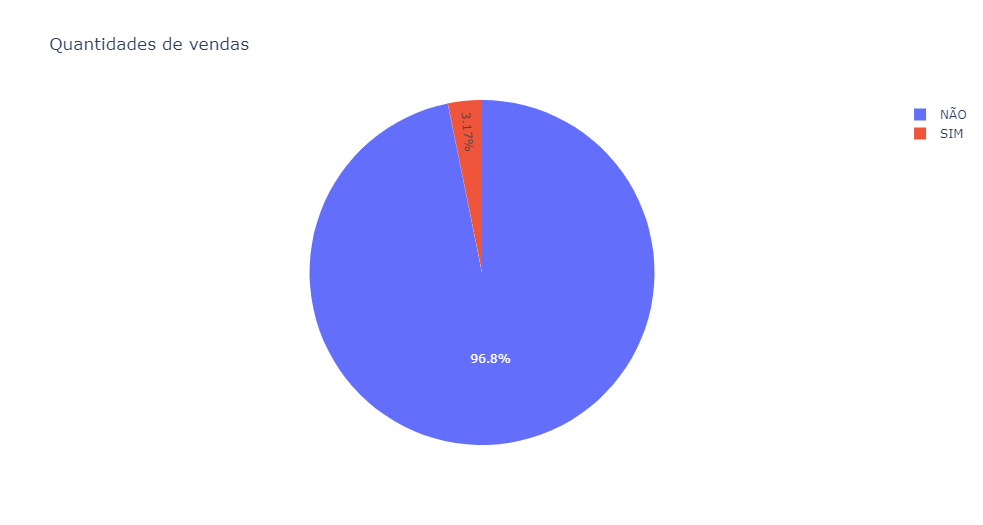

No gráfico podemos notar que 3.17% dos LEADS foram convertidos efetivamente em vendas; Agora vamos analisar esse sub-conjunto dos dados. 

## b.	Quais os fatores/características de maior influência para que um lead realize a contratação?

De acordo com a análise feita, as características que mais influenciaram para que um lead realizasse a contratação foram: porte da empresa e origem do Lead; Abaixo a análise utilizada: 

In [50]:
df1['VENDIDO'] = df1['VENDIDO'].map({'SIM':1,'NÃO':0})

In [51]:
df1.head()

,LEAD_ID,DATA CADASTRO,VENDIDO,ORIGEM,MERCADO,PORTE,OBJETIVO,LOCAL
0,11316042,2021-02-10 16:23:30,0,Orgânico,Varejo,1-10,Abertura/Expansão,Belém - PA
1,11374979,2021-02-17 11:10:28,0,Orgânico,Varejo,11-50,NaN,"São Paulo, SP"
2,11997870,2021-04-15 11:06:00,0,Prospecção Ativa,Varejo,NaN,NaN,-
3,11930537,2021-04-09 13:10:21,0,Prospecção Ativa,Varejo,NaN,NaN,-
4,11899381,2021-04-07 13:13:49,0,Prospecção Ativa,Varejo,NaN,NaN,-


Estas são as primeiras 5 linhas do nosso DataFrame; Nele existem informações da empresa que adquiriu o produto como:

    - Local da empresa;
    - Porte da empresa;
    - Mercado de atuação.

E informações sobre obtenção do LEAD:

    - Sua origem;
    - e o Objetivo da campanha de marketing; 
    
Nela também existem informações da Data e Hora da venda, bem como se o LEAD foi convertido ou não;

### c.	Como foi possível chegar a essa conclusão?

In [52]:
# análise dos leads convertidos 
venda = df1.query("VENDIDO == 1")



In [ ]:
ax = venda["PORTE"].value_counts().index
ay = venda["PORTE"].value_counts().values

fig = px.bar(df1, x=ax, y=ay, labels={
                     'x': "Porte da Empresa",
                     'y': "Quantidade de Vendas Realizadas"}, title = 'Análise Vendas/Porte')
fig.show()

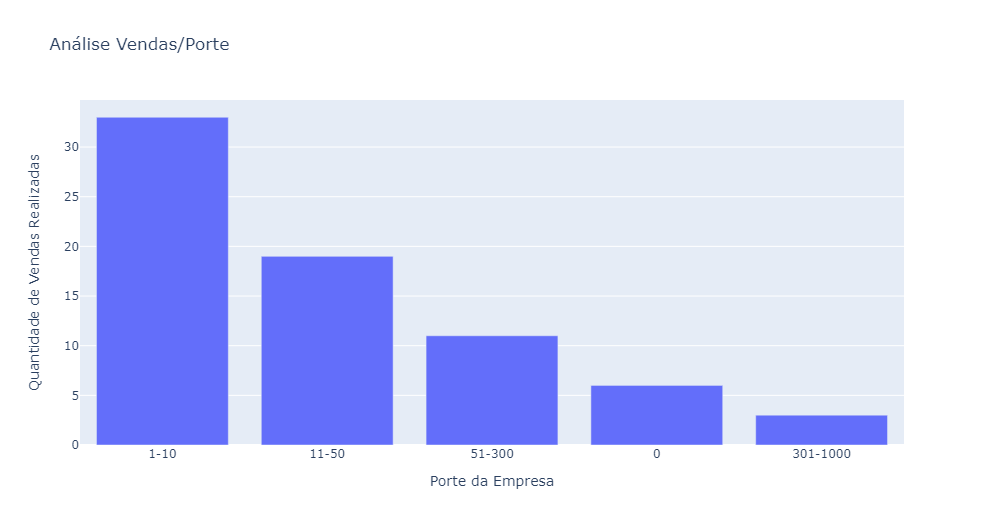

In [54]:
a = (ay[0] + ay[1])
b = a/(ay.sum()) * 100
print(f'{b :.2f}% das vendas foram efetuadas por empresas de até 50 funcionários! ')

72.22% das vendas foram efetuadas por empresas de até 50 funcionários! 


Analisando os leads convertidos pelo porte da empresa, podemos ver claramente que o produto é mais consumido **72.22% por empresas de até 50 funcionários**. o que enquadra em Empresa de Pequeno Porte (pela definição até 100 funcionários); 

In [55]:
a = (ay[0] + ay[1] + ay[2])
b = a/(ay.sum()) * 100
print(f'{b :.2f}% das vendas foram efetuadas por empresas de até 300 funcionários! ')


87.50% das vendas foram efetuadas por empresas de até 300 funcionários! 


Se analisarmos as vendas para empresas de até 300 funcionários esse número chega a **87.50%**. 

In [56]:
b = ay[0]/ay.sum() * 100
print(f'{b :.2f}% das vendas foram efetuadas por empresas de até 10 funcionários! ')

45.83% das vendas foram efetuadas por empresas de até 10 funcionários! 


**Mas o que mais chamou minha atenção foi o fato de quase metade das vendas ser feita para empresas de até 10 funcionários;** 

### Olhando para a origem de cada Lead: 

In [ ]:
ax = venda["ORIGEM"].value_counts().index
ay = venda["ORIGEM"].value_counts().values

fig = px.bar(df1, x=ax, y=ay, labels={
                     'x': "Origem da Empresa",
                     'y': "Quantidade de Vendas Realizadas"
                 })
fig.show()

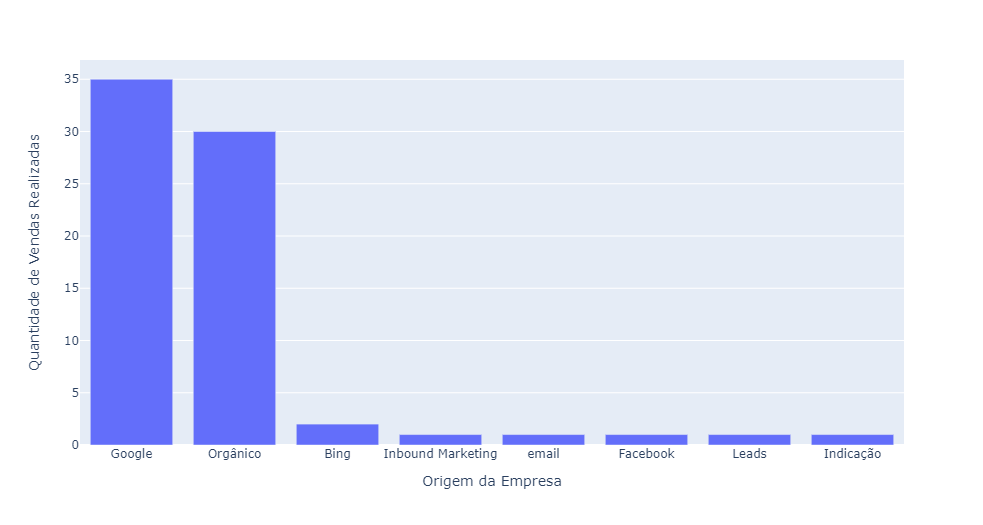

Neste gráfico fica bem demonstrado que o cliente que mais efetua a compra é o cliente que é **atingido por um anúncio pago 48.61%** ou ainda aquele que é atingido espontaneamente por um **post orgânico (41.67%)**! 

Partindo dessa ideia, tb é possível dizer que campanha nos trouxe esse cliente:

In [ ]:
ax = venda["OBJETIVO"].value_counts().index
ay = venda["OBJETIVO"].value_counts().values

fig = px.bar(df, x=ax, y=ay, labels={
                     'x': "Objeitvo da Campanha",
                     'y': "Quantidade de Vendas Realizadas"
                 })
fig.show()

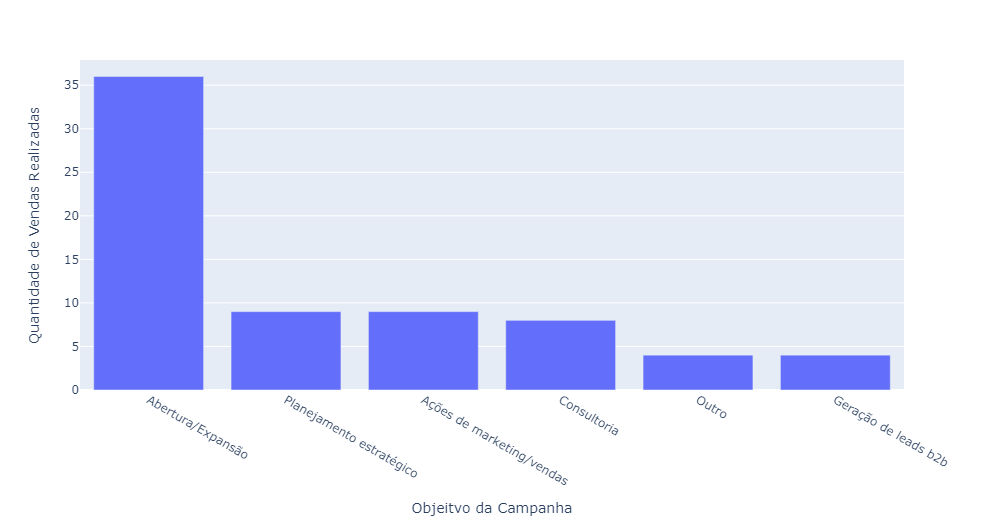

As campanhas de abertura foram as que mais trouxeram clientes, abrange 50% das vendas! 

### Entendendo o Mercado do Nosso Público: 

In [ ]:
ax = venda["MERCADO"].value_counts().index
ay = venda["MERCADO"].value_counts().values

fig = px.bar(df, x=ax, y=ay, labels={
                     'x': "Mercado",
                     'y': "Quantidade de Vendas Realizadas"
                 })
fig.show()

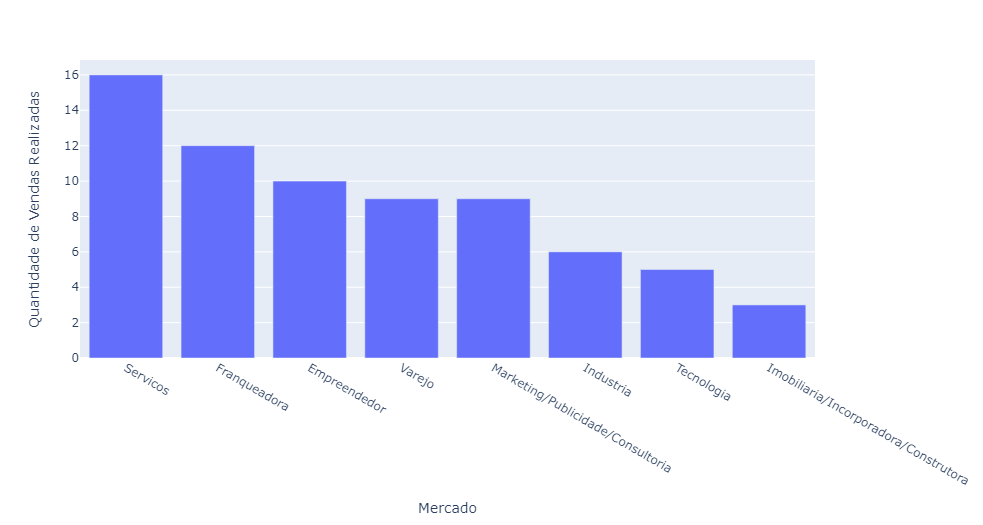


Trata-se de um público heterogêneo; nossos clientes são compontos principalmente de empresas do ramo de prestadores de serviço, porém alcaçamos também vários tipos de empresa; 

Também quis mostrar de onde são os nossos LEADS convertidos: 


In [ ]:
venda['LOCAL'] = venda['LOCAL'].replace('São Paulo, SP','São Paulo - SP')
localidade = venda["LOCAL"].value_counts()
vendas = venda.groupby("LOCAL")["VENDIDO"].sum().to_frame()
vendas = vendas.sort_values(by='VENDIDO', ascending=False).head(10)
vendas['LOCAL'] = vendas.index
vendas.reset_index(drop=True, inplace=True)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=vendas['LOCAL'],
    x=vendas['VENDIDO'],
    orientation='h'
))

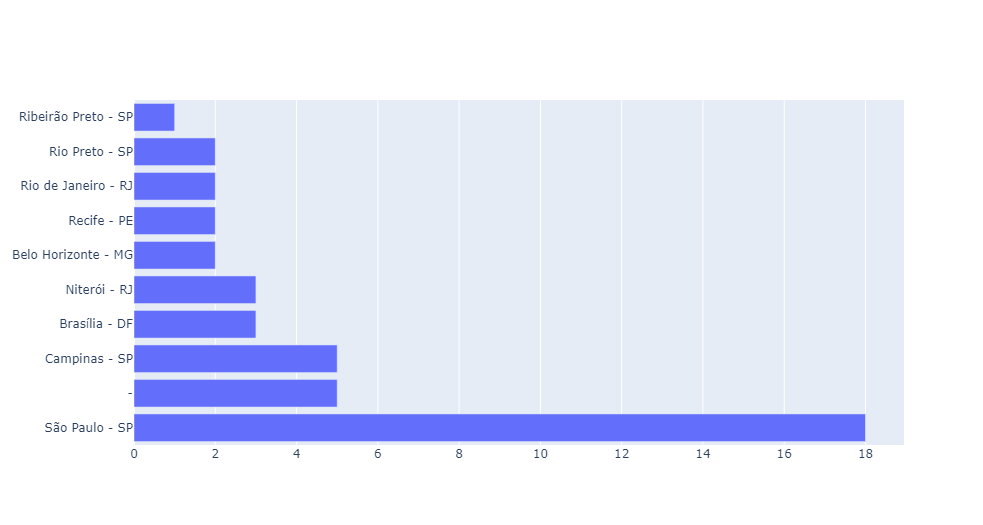

Aqui está a lista de compradores por Cidade - Estado; 

    -  a maioria dos clientes são da cidade de São Paulo; 
    -  existem clientes que estão sem o nome da cidade (foi preenchido com um - )

Uma análise mais completa poderia ser feita com mais dados desses leads; outra coisa que notei foram muitos dados faltantes ou ainda preenchidos incorretamente, como demonstra o gráfico acima; 

In [66]:
venda['DATA CADASTRO'] = pd.to_datetime(venda['DATA CADASTRO'])

In [67]:
venda['DATA CADASTRO'].dt.month.value_counts().sort_values(ascending=False)

1     18
3     17
12    15
2     13
4      9
Name: DATA CADASTRO, dtype: int64

O mês de maior vendas foi o Mês de Janeiro 2021, seguido de Março 2021 e Dezembro de 2020; 

<AxesSubplot:xlabel='DATA CADASTRO'>

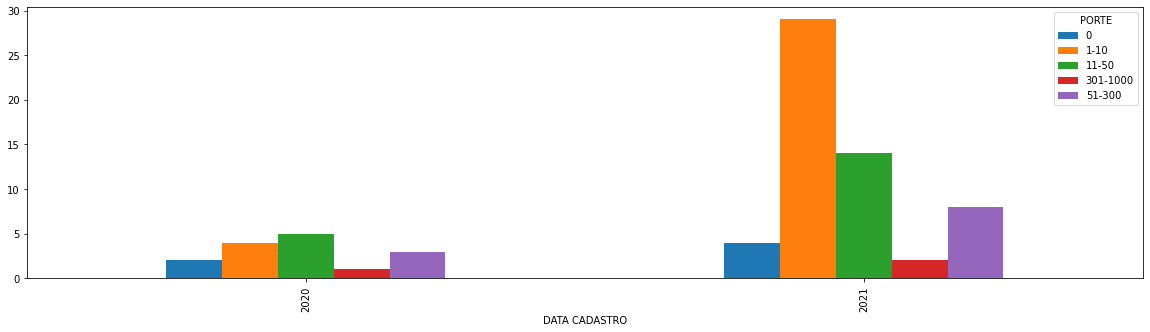

In [68]:
venda.groupby([venda['DATA CADASTRO'].dt.year, 'PORTE']).size().unstack(1).fillna(0).plot(kind='bar', figsize=(20,5))

Neste último gráfico mostro a quantidade de vendas relacionada ao porte da empresa com o ano de cadastro na tabela; 

### d.	A partir dessa análse, que recomendação você daria ao setor de marketing, visando aumentar as chances de conversão em futuras campanhas/investimentos?

alguns insigths dos dados disponibilizados: 

    - A maioria dos Leads convertidos são empresas pequenas;
    - A maioria do alcance a esses Leads deu-se por campanhas pagas (Google) e ainda 
    Anúncios/Posts espontâneos (Orgânico);
    - A campanha de Abertura/Expansão foi a que mais converteu clientes; 
    - Temos um público diverso (vários tipos de atividades de Mercado);

minhas recomendações em cima desses insigths são:

    - Focar no pequeno, focar em empresas que tem poucos funcionários e consequentemente são as que tem menos receita, 
    eles são o nosso principal público. 
    - Sugiro alguns incentivos a esses possíveis compradores como: oferecimento de vantagens; oferecimento de fidelização (alguma campanha voltada para fidelizar esse cliente fazendo com que ele volte a comprar ou renovar o serviço oferecido);
    - Sugiro aumentar o conteúdo de e-mail marketing (notei que não é uma das maneiras mais usadas pela empresa para 
    campanhas) e é uma ótima ferramenta de atração de novos clientes, onde pode-se atingir todo tipo de empresa independente
    do porte; 
    - Refazer campanhas como a de Abertura/Expansão usando  a mesma tática já que ela trouxe muitos Leads convertidos;
    - Sugiro além do Marketing prezar pelo preenchimento das tabelas para não ter muitos itens faltantes como no caso do
    Ranking das cidades; 
    - Sugiro focar no produto como solução já que temos clientes de vários ramos, fazendo melhoria na entrega
    do nosso produto;
    - Continuar realizando análise de Leads; 
   